#  SALARY ESTIMATION USING K-NEAREST NEIGHBOURS

## Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [33]:
df = pd.read_csv("salary.csv")

In [34]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K
8,68,9,0,40,<=50K
9,41,10,0,60,>50K


## Summarising the Dataset

In [35]:
print(df.describe())
print("Shape of dataset : ", df.shape)

                age  education.num  capital.gain  hours.per.week
count  32561.000000   32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844       40.437456
std       13.640433       2.572720   7385.292085       12.347429
min       17.000000       1.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000       99.000000
Shape of dataset :  (32561, 5)


In [36]:
print(df['income'].describe())
income_set = set(df['income'].unique().tolist())
print("unique Items : ", income_set)

count     32561
unique        2
top       <=50K
freq      24720
Name: income, dtype: object
unique Items :  {'>50K', '<=50K'}


## Mapping Income data to Binary values

In [37]:
#Transforming values of dependent variable 'Income' into Binary Values
df['income'] = df['income'].map({"<=50K" : 0, ">50K" : 1}).astype(int)

In [38]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


## Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)

In [42]:
X = df.iloc[:, :-1]
X.head()

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40


In [44]:
Y = df.iloc[:, -1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

## Splitting Dataset into Train and Test Models

In [46]:
# Train Set comprises 75% of overall dataset and Test Set comprises 25% of overall dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling - Standardisation
###           X = (X - M) / SD

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)     # Standardisation w.r.t mean and standard deviation each field
X_test = sc.transform(X_test)           # Standardisation by combining all fields into one (Used just to differentiate mode of test data from train data to develop generalised prediction models)           

In [54]:
X_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

In [55]:
X_test

array([[ 1.27591266, -1.98305776, -0.14509813, -0.03923011],
       [-1.43485534, -0.42608063, -0.14509813, -1.25599461],
       [-1.14179934, -0.03683634, -0.14509813, -0.44481828],
       ...,
       [ 0.39674466, -0.03683634, -0.14509813,  1.1775344 ],
       [ 1.42244067, -0.42608063, -0.14509813,  0.77194623],
       [ 1.20264866, -0.03683634, -0.14509813,  0.36635806]])

## Finding Best *K* value for K-Nearest Neighbours Classification

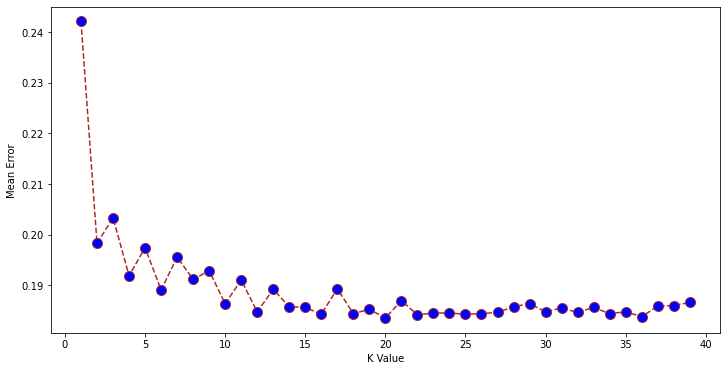

In [60]:
from sklearn.neighbors import KNeighborsClassifier

Error = []    # to store mean error in prediction for each K-value

for i in range(1, 40):    # Finding best K in range (1, 40)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Error.append(np.mean(Y_pred != Y_test))
    
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), Error, color = 'brown', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.xlabel("K Value")
plt.ylabel("Mean Error")
plt.show()

## Model Training
 
### Nearest Distance metric : MINIKOWSKI
###           d(X, Y) =  $(\sum \limits _{j=1} ^{n} (|X_{j} - Y_{j}|^p))^{1/p}$

### if p is 1,  Manhattan Distance =  d(X, Y) =  $(\sum \limits _{j=1} ^{n} (|X_{j} - Y_{j}|))$
### if p is 2,  Euclidean Distance =   d(X, Y) = $(\sum \limits _{j=1} ^{n} (|X_{j} - Y_{j}|^2))^{1/2}$

In [62]:
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=16)

## Testing of Model

In [64]:
Y_pred = model.predict(X_test)
Y_test = np.array(Y_test)
Pred_Data = np.concatenate((Y_test.reshape(len(Y_test), 1), Y_pred.reshape(len(Y_pred), 1)), axis = 1)
#print(Pred_Data)
df_pred = pd.DataFrame(Pred_Data, columns = ['Actual', 'Prediction'])
df_pred.head(10)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,0,0
8,0,0
9,1,0


## Error metrics

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
Confusion_Matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :\n", Confusion_Matrix)
print("Accuracy of the Model: {0:.2f}%".format(accuracy_score(Y_test, Y_pred)*100))

Confusion Matrix :
 [[5876  317]
 [1183  765]]
Accuracy of the Model: 81.57%


## Prediction of New Data

In [69]:
age = int(input("Enter age of new employee :"))
edu = int(input("Enter education of new employee(in num) : "))
cg = int(input("Enter capital gain of new employee :"))
hpw = int(input("Enter No. of ours per week of new employee :"))
newPred = [[age, edu, cg, hpw]]
result = model.predict(sc.transform(newPred))        # Standardising of data as same as Test Model
print(result)
if result :
    print("Salary is : >50K")
else:
    print("Salary is : <=50K")

Enter age of new employee :68
Enter education of new employee(in num) : 9
Enter capital gain of new employee :0
Enter No. of ours per week of new employee :40
[0]
Salary is : <=50K


### ___Thank you___